<a href="https://colab.research.google.com/github/abhi-shek-86/Code_Spaze_Internship/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install tensorflow


In [18]:


import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np               # Correct way to import NumPy
import matplotlib.pyplot as plt   # Correct way to import Matplotlib


In [19]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [20]:
X_test.shape

(10000, 32, 32, 3)

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
y_train.shape

(50000, 1)

In [24]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [25]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [26]:
y_test = y_test.reshape(-1,)

In [27]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [28]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

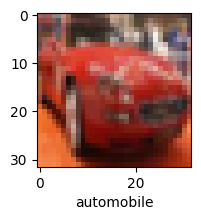

In [30]:
plot_sample(X_train, y_train, 5)

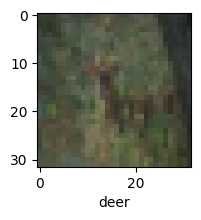

In [31]:
plot_sample(X_train, y_train, 10)

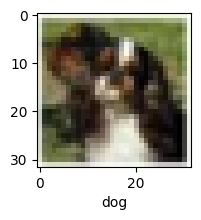

In [32]:
plot_sample(X_train, y_train, 500)

In [34]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [39]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Flatten the input image
    layers.Dense(3000, activation='relu'),    # First Dense layer with 3000 units and ReLU activation
    layers.Dense(1000, activation='relu'),    # Second Dense layer with 1000 units and ReLU activation
    layers.Dense(10, activation='softmax')    # Output layer for 10 classes with softmax activation
])

ann.compile(optimizer='SGD' ,
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 245s 155ms/step - accuracy: 0.1217 - loss: 2.3015
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 106ms/step - accuracy: 0.1308 - loss: 2.2998
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 101ms/step - accuracy: 0.1356 - loss: 2.2993
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.1536 - loss: 2.2983
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 100ms/step - accuracy: 0.1447 - loss: 2.2973


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification_report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
classification_report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
import seaborn as sns

In [46]:
from tensorflow.keras import datasets, layers, models

# Define the CNN model
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Compile the CNN model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',  # or categorical_crossentropy if labels are one-hot encoded
            metrics=['accuracy'])

# Now the model is defined and compiled


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.1031 - loss: 2.3028
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.1009 - loss: 2.3027
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.1011 - loss: 2.3028
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.0995 - loss: 2.3027
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.0978 - loss: 2.3028
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.0989 - loss: 2.3028
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.1024 - loss: 2.3027
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.0977 - loss: 2.3028
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.0970 - loss: 2.3028
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 50ms/step - accuracy: 0.1024 - loss: 2.3026


In [52]:
# Evaluate the model on test data
cnn.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.1154 - loss: 2.3026


[2.3032896518707275, 0.11240000277757645]

In [53]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


array([[0.10155493, 0.08564539, 0.10230213, 0.08678551, 0.09644468,
        0.0964213 , 0.11119013, 0.11470085, 0.11650262, 0.08845248],
       [0.10354034, 0.0828603 , 0.09664425, 0.08077072, 0.08531018,
        0.09969044, 0.11943135, 0.11496065, 0.13193925, 0.08485251],
       [0.10243801, 0.0860303 , 0.0987616 , 0.08312686, 0.08765461,
        0.09831659, 0.11448067, 0.11532801, 0.12881318, 0.08505015],
       [0.10192811, 0.08379582, 0.09878806, 0.08233576, 0.08875813,
        0.09871058, 0.11503287, 0.11671238, 0.13082965, 0.0831086 ],
       [0.10213071, 0.08863369, 0.10042198, 0.0886459 , 0.09395804,
        0.09944611, 0.10961598, 0.11183478, 0.11792458, 0.08738818]],
      dtype=float32)

In [55]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 8, 8, 8]

In [56]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

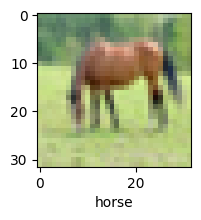

In [57]:
(plot_sample(X_test, y_test, 60))

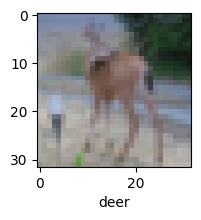

In [58]:
(plot_sample(X_test, y_test, 100))

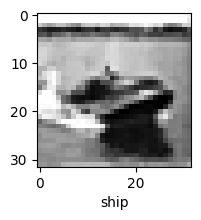

In [59]:
(plot_sample(X_test, y_test, 150))

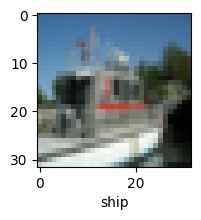

In [60]:
(plot_sample(X_test, y_test, 600))

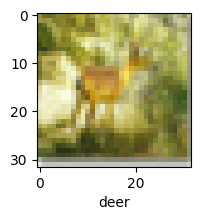

In [61]:
(plot_sample(X_test, y_test, 500))

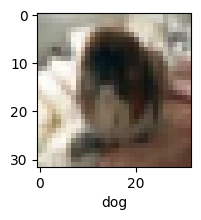

In [62]:
(plot_sample(X_test, y_test, 200))